In [73]:
# Task 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Task 2: Data frame
df=pd.read_csv("Monthly_Uniform_Crime_Reporting__UCR__Program_Statistics_20241008.csv")
print(df)


                     Type  Count      Month  Year        Date
0                Homicide      6    January  2006  01/31/2006
1                    Rape     16    January  2006  01/31/2006
2                 Robbery    166    January  2006  01/31/2006
3                 Assault    136    January  2006  01/31/2006
4                Burglary    354    January  2006  01/31/2006
...                   ...    ...        ...   ...         ...
1570              Robbery     10  September  2024  09/30/2024
1571              Assault     38  September  2024  09/30/2024
1572             Burglary     44  September  2024  09/30/2024
1573              Larceny    252  September  2024  09/30/2024
1574  Motor Vehicle Theft     36  September  2024  09/30/2024

[1575 rows x 5 columns]


In [77]:
# Task 2: Dataset Statistics
df.describe()

,Count,Year
count,1575.000000,1575.000000
mean,177.301587,2014.880000
std,216.429390,5.415184
min,0.000000,2006.000000
25%,15.000000,2010.000000
50%,107.000000,2015.000000
75%,193.000000,2020.000000
max,1063.000000,2024.000000


In [79]:
#visualizing the data
df.head()

,Type,Count,Month,Year,Date
0,Homicide,6,January,2006,01/31/2006
1,Rape,16,January,2006,01/31/2006
2,Robbery,166,January,2006,01/31/2006
3,Assault,136,January,2006,01/31/2006
4,Burglary,354,January,2006,01/31/2006


In [81]:
# Task 3: Handling missing entries.
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include=['int64','float64']):
    df[col] = df[col].fillna(df[col].mean())
df

,Type,Count,Month,Year,Date
0,Homicide,6,January,2006,01/31/2006
1,Rape,16,January,2006,01/31/2006
2,Robbery,166,January,2006,01/31/2006
3,Assault,136,January,2006,01/31/2006
4,Burglary,354,January,2006,01/31/2006
...,...,...,...,...,...
1570,Robbery,10,September,2024,09/30/2024
1571,Assault,38,September,2024,09/30/2024
1572,Burglary,44,September,2024,09/30/2024
1573,Larceny,252,September,2024,09/30/2024


In [83]:
# Task 4: Handle mismatched string formats..
for val in df.columns:
    if df[val].dtype == "object":
        df[val] = df[val].str.strip().str.lower()
df

,Type,Count,Month,Year,Date
0,homicide,6,january,2006,01/31/2006
1,rape,16,january,2006,01/31/2006
2,robbery,166,january,2006,01/31/2006
3,assault,136,january,2006,01/31/2006
4,burglary,354,january,2006,01/31/2006
...,...,...,...,...,...
1570,robbery,10,september,2024,09/30/2024
1571,assault,38,september,2024,09/30/2024
1572,burglary,44,september,2024,09/30/2024
1573,larceny,252,september,2024,09/30/2024


In [85]:
# Task 5: Handling outliers.
for _ in df.columns:
    if df[_].dtype in ['float', 'int']:
        q1 = df[_].quantile(0.25)
        q3 = df[_].quantile(0.75)
        range_ = q3 - q1
        lower = q1 - 1.5 * range_
        upper = q3 + 1.5 * range_
        mean = df[_].mean()
        df.loc[(df[_] < lower) | (df[_] > upper), col] = mean
df

/var/folders/28/p50kbvjn289_vtqc3c7bpz5h0000gn/T/ipykernel_22557/2631997065.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '177.3015873015873' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[_] < lower) | (df[_] > upper), col] = mean


,Type,Count,Month,Year,Date
0,homicide,6,january,2006.0,01/31/2006
1,rape,16,january,2006.0,01/31/2006
2,robbery,166,january,2006.0,01/31/2006
3,assault,136,january,2006.0,01/31/2006
4,burglary,354,january,2006.0,01/31/2006
...,...,...,...,...,...
1570,robbery,10,september,2024.0,09/30/2024
1571,assault,38,september,2024.0,09/30/2024
1572,burglary,44,september,2024.0,09/30/2024
1573,larceny,252,september,2024.0,09/30/2024


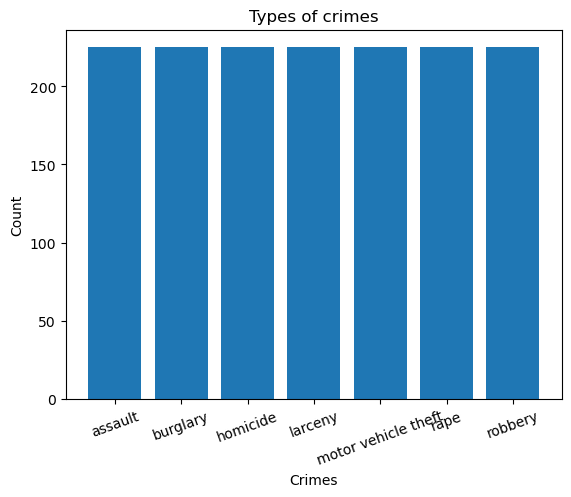

In [87]:
# Task 6: Data Visualization 
types = df.groupby("Type").size()
plt.bar(types.index,types.values)
plt.title("Types of crimes")
plt.xlabel("Crimes")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

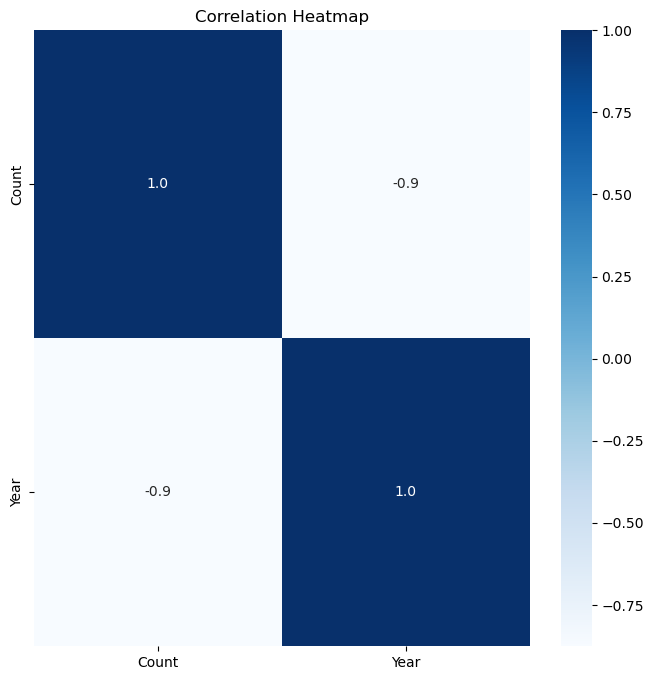

In [89]:
# Task 6: Data Visualization 
numeric_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

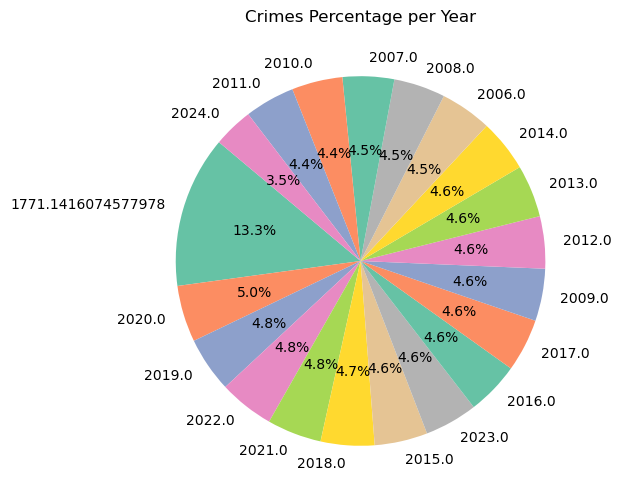

In [91]:
df['Year'].value_counts().plot.pie(
    startangle=140, 
    colors=sns.color_palette('Set2'), 
    figsize=(6,6), 
    autopct='%1.1f%%'
)

plt.title('Crimes Percentage per Year')
plt.ylabel('')
plt.show()


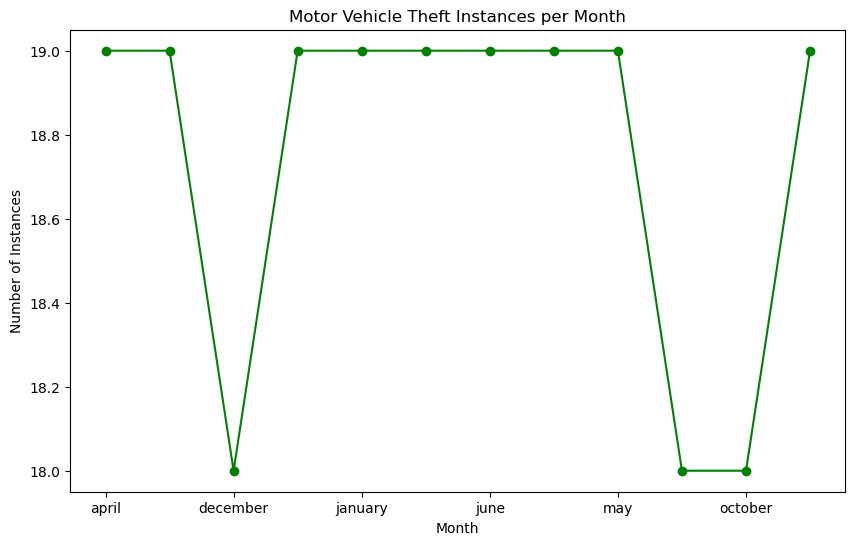

In [93]:
df[df['Type'] == 'motor vehicle theft'] \
  .groupby('Month').size() \
  .plot(kind='line', marker='o', color='green', figsize=(10,6))

plt.title('Motor Vehicle Theft Instances per Month')
plt.xlabel('Month')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

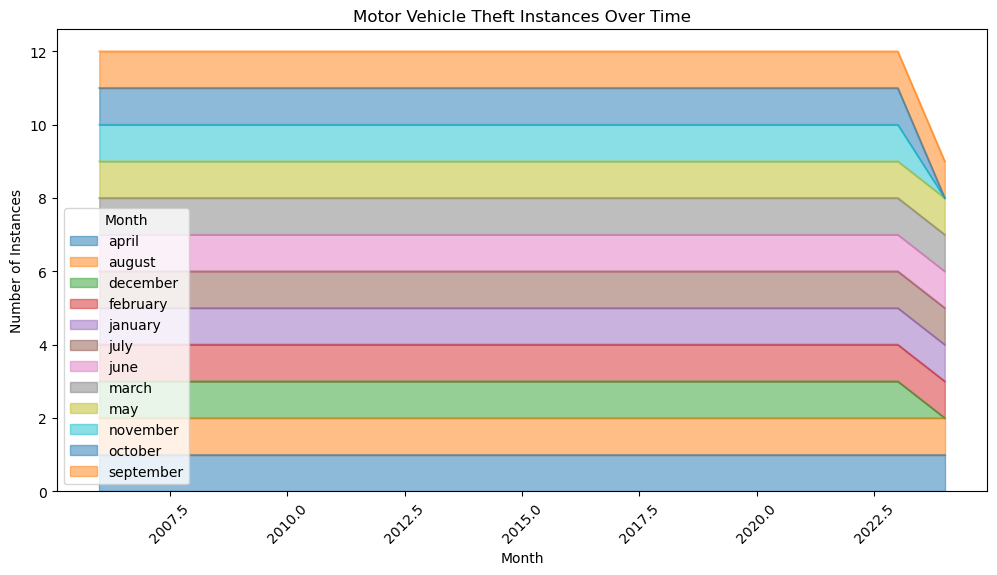

In [95]:
theft_data = df[df['Type'] == 'motor vehicle theft']
monthly_theft_counts = theft_data.groupby(['Year', 'Month']).size().unstack()
monthly_theft_counts.plot(kind='area', figsize=(12, 6), alpha=0.5)
plt.title('Motor Vehicle Theft Instances Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

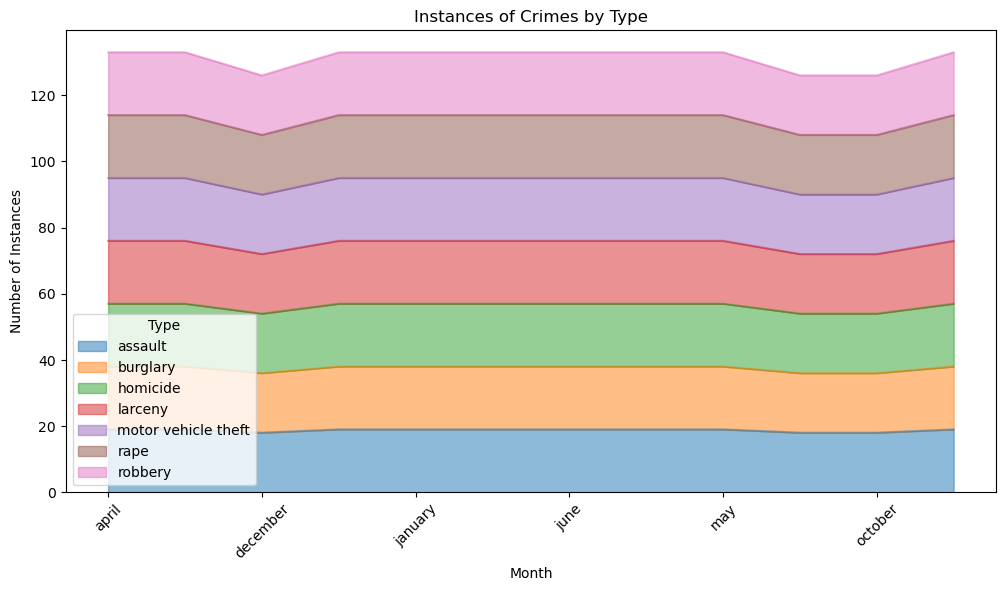

In [97]:
df.groupby(['Month', 'Type']) \
  .size() \
  .unstack() \
  .plot(kind='area', figsize=(12, 6), alpha=0.5)

plt.title('Instances of Crimes by Type')
plt.xlabel('Month')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [99]:
df1 = df.copy()

Correlation value of each feature with gender:
 Count    1.000000
Date     0.039840
Month    0.018886
Type    -0.158313
Year    -0.875829
Name: Count, dtype: float64

columns with low corelation : []


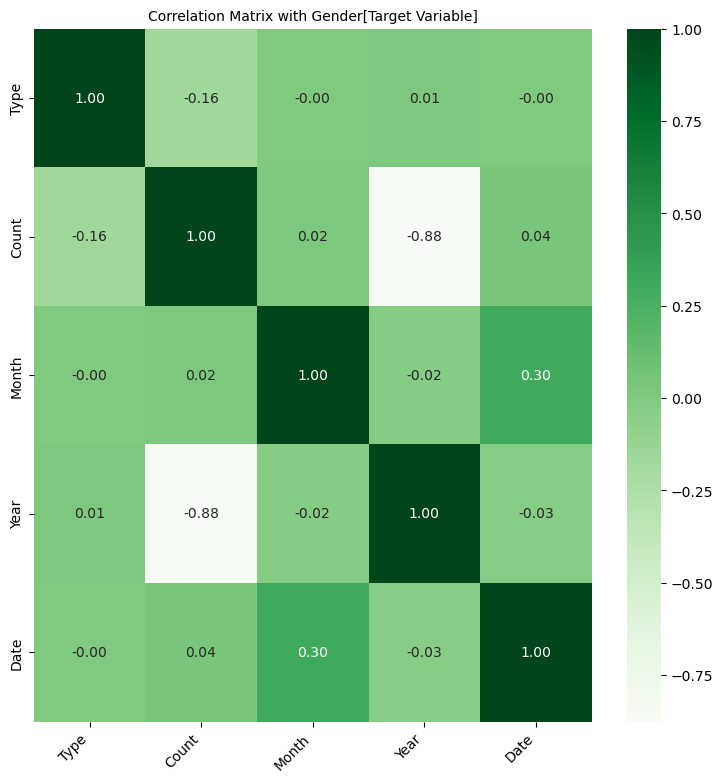

In [101]:
# Task 7: Correlation Identification
df['Type'] = pd.Categorical(df['Type']).codes

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes
matrix = df.corr()

correlation = matrix['Count'].sort_values(ascending=False)
print("Correlation value of each feature with gender:\n", correlation)

threshold = 0.001

low = correlation[correlation.abs() < threshold].index

df = df.drop(columns=low)

print(f"\ncolumns with low corelation : {list(low)}")


plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt=".2f")


plt.title("Correlation Matrix with Gender[Target Variable]", size=10)
plt.xticks(rotation=45, ha='right')
plt.show()


In [121]:

# Task 2:Choose target variable

X = df.drop(columns=['Count'])
y = df['Count']


In [123]:
# Task 3: Divide the dataset
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [125]:
# Select numeric columns
normalize = df.select_dtypes(include=['float', 'int']).columns

# Calculate min and max for each column
min_values = df[normalize].min()
max_values = df[normalize].max()

print('Minimum of each column is:\n', min_values)
print('Maximum of each column is:\n', max_values)

# Apply normalization for each numeric column
for column in normalize:
    df[column] = (df[column] - min_values[column]) / (max_values[column] - min_values[column])

df


Minimum of each column is:
 Count    0.0
Year     0.0
dtype: float64
Maximum of each column is:
 Count    1.0
Year     1.0
dtype: float64


,Type,Count,Month,Year,Date
0,2,0.005644,4,0.928814,0
1,5,0.015052,4,0.928814,0
2,6,0.156162,4,0.928814,0
3,0,0.127940,4,0.928814,0
4,1,0.333020,4,0.928814,0
...,...,...,...,...,...
1570,6,0.009407,11,1.000000,170
1571,0,0.035748,11,1.000000,170
1572,1,0.041392,11,1.000000,170
1573,3,0.237065,11,1.000000,170


In [127]:
# Task 4: Creation of the data matrices
print("X_train : ",X_train.values)
print("X_test : ",X_test.values)
print("y_train : ",y_train.values)
print("y_test : ",y_test.values)

X_train :  [[  2.           4.           0.92881391   0.        ]
 [  5.           4.           0.92881391   0.        ]
 [  6.           4.           0.92881391   0.        ]
 ...
 [  1.           2.           0.98418087 221.        ]
 [  3.           2.           0.98418087 221.        ]
 [  4.           2.           0.98418087 221.        ]]
X_test :  [[  2.           4.           0.98813565  15.        ]
 [  5.           4.           0.98813565  15.        ]
 [  6.           4.           0.98813565  15.        ]
 ...
 [  1.          11.           1.         170.        ]
 [  3.          11.           1.         170.        ]
 [  4.          11.           1.         170.        ]]
y_train :  [0.0056444  0.01505174 0.15616181 ... 0.12511759 0.42803387 0.1335842 ]
y_test :  [0.00940734 0.01128881 0.04891816 0.09219191 0.08278457 0.37064911
 0.18814675 0.0028222  0.01034807 0.03386642 0.10253998 0.09407338
 0.30761994 0.1533396  0.00376294 0.01317027 0.02822201 0.10065851
 0.08842897 0

In [129]:
# Task 5: shape
print("X_train : ",X_train.shape)
print("X_train : ",X_test.shape)
print("y_test : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1260, 4)
X_train :  (315, 4)
y_test :  (1260,)
y_test :  (315,)


In [131]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [133]:
weights = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(weights)

[ 6.78501729e-01 -1.61947465e-02  1.49633095e-04 -5.58278800e-01
  5.30420680e-05]


In [135]:
y_train_pred = X_train_b.dot(weights)
y_test_pred = X_test_b.dot(weights)

In [137]:
mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'MSE on training set: {mse_train:.10f}')  # Format to 10 decimal places
print(f'MSE on test set: {mse_test:.10f}') 

MSE on training set: 0.0091763055
MSE on test set: 0.0073620721


In [139]:
import pickle
def mse(weights, filename):
    with open(filename, 'wb') as file:
        pickle.dump(weights, file)
    print(f"Weights saved to {filename}")

mse(weights, 'mse_bonus.pkl')

Weights saved to mse_bonus.pkl


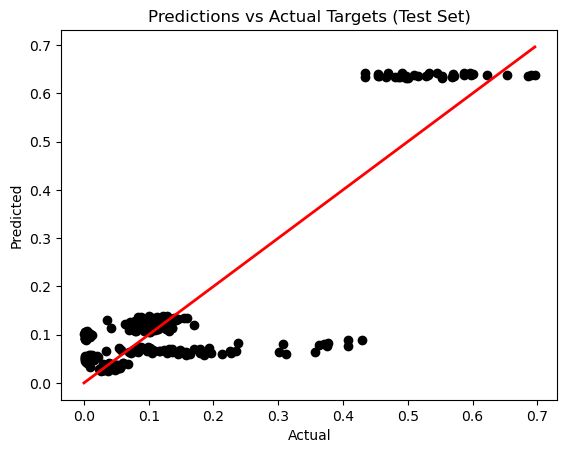

In [141]:
plt.scatter(y_test, y_test_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs Actual Targets (Test Set)')
plt.show()

In [143]:
lambda_reg = 0.1
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [145]:
n_features = X_train_b.shape[1]
identity_matrix = np.eye(n_features)
identity_matrix[0, 0] = 0

In [147]:
weights_ridge = np.linalg.inv(X_train_b.T.dot(X_train_b) + lambda_reg * identity_matrix).dot(X_train_b.T).dot(y_train)
print(weights_ridge)

[ 6.78158634e-01 -1.61956444e-02  1.50030693e-04 -5.57870959e-01
  5.31042399e-05]


In [149]:
y_train_pred = X_train_b.dot(weights_ridge)
y_test_pred = X_test_b.dot(weights_ridge)

In [151]:
mse_train_ridge = np.mean((y_train - y_train_pred) ** 2)
mse_test_ridge = np.mean((y_test - y_test_pred) ** 2)
print(f'Ridge Regression on training set: {mse_train_ridge:.10f}')  
print(f'Ridge Regression on test set: {mse_test_ridge:.10f}')     

Ridge Regression on training set: 0.0091763236
Ridge Regression on test set: 0.0073552337


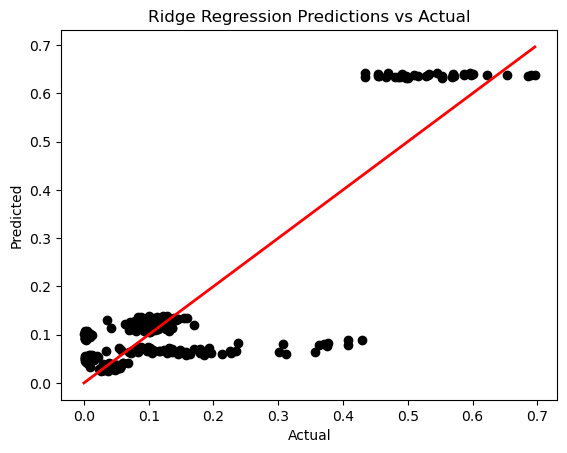

In [153]:
plt.scatter(y_test, y_test_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predictions vs Actual')
plt.show()

In [155]:
def ridge_bonus(weights, filename):
    with open(filename, 'wb') as file:
        pickle.dump(weights, file)
    print(f"Weights saved to {filename}")
ridge_bonus(weights_ridge, 'ridge_bonus.pkl')

Weights saved to ridge_bonus.pkl


In [157]:
ss_res_train = np.sum((y_train - y_train_pred) ** 2) 
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2) 
r2_train = 1 - (ss_res_train / ss_tot_train)
ss_res_test = np.sum((y_test - y_test_pred) ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)
r2_train_percentage = r2_train * 100
r2_test_percentage = r2_test * 100
print(f'Accuracy on training set: {r2_train_percentage:.2f}%')
print(f'Accuracy on test set: {r2_test_percentage:.2f}%')

Accuracy on training set: 79.33%
Accuracy on test set: 73.72%


# Bonus Task-2

The penguins dataset has an accuracy of 86.96 % with logistic regresssion using Gradient descent